In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": "--"})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

    41 : Tower top acceleration - Trained on RMS values

In [2]:
feature = pd.read_csv("L_R_z_values_pass.csv", index_col=0)
label = pd.read_csv("Result_index_41.csv", index_col=1)
df = pd.merge(feature,label,on="File_ID",how="inner")
df = df[['L_values','R_anchor','z_fairlead','RMS']]

In [3]:
print('Maximum value of RMS of tower top acceleration: %.6f' % df['RMS'].max())
print('Minimum value of RMS of tower top acceleration: %.6f' % df['RMS'].min())
print('Range for RMS of tower top acceleration: %.6f' % (df['RMS'].max()-df['RMS'].min()))
print('Mean for RMS of tower top acceleration: %.6f' % (np.mean(df['RMS'])))

Maximum value of RMS of tower top acceleration: 0.306517
Minimum value of RMS of tower top acceleration: 0.245345
Range for RMS of tower top acceleration: 0.061172
Mean for RMS of tower top acceleration: 0.272008


In [4]:
df.head()

,L_values,R_anchor,z_fairlead,RMS
File_ID,,,,
0,800,800,0,0.250956
1,800,800,1,0.252863
2,800,800,2,0.254157
3,800,800,3,0.250269
4,800,800,4,0.254042


In [5]:
df.shape

(1300, 4)

In [6]:
reference_value = df[(df['RMS']<= 14 ) ].iloc[-1]

In [7]:
df.isna().sum()

L_values      0
R_anchor      0
z_fairlead    0
RMS           0
dtype: int64

# Reference value for 15 MW turbine

In [8]:
reference_value = df[(df['R_anchor']== 840) & (df['L_values']== 850) & (df['z_fairlead']== 14 ) ].iloc[-1]

df.iloc[[df.index.get_loc(reference_value.name)]]

,L_values,R_anchor,z_fairlead,RMS
File_ID,,,,
1194,850,840,14,0.279041


# Sensitivity analysis

In [9]:
# varying z_fairlead
df1 = df[(df['R_anchor']== 840) & (df['L_values']== 850) ]

# varying L
df2 = df[(df['R_anchor']== 840) & (df['z_fairlead']== 14) ]

# varying R_anchor
df3 = df[(df['L_values']== 850) & (df['z_fairlead']== 14) ]

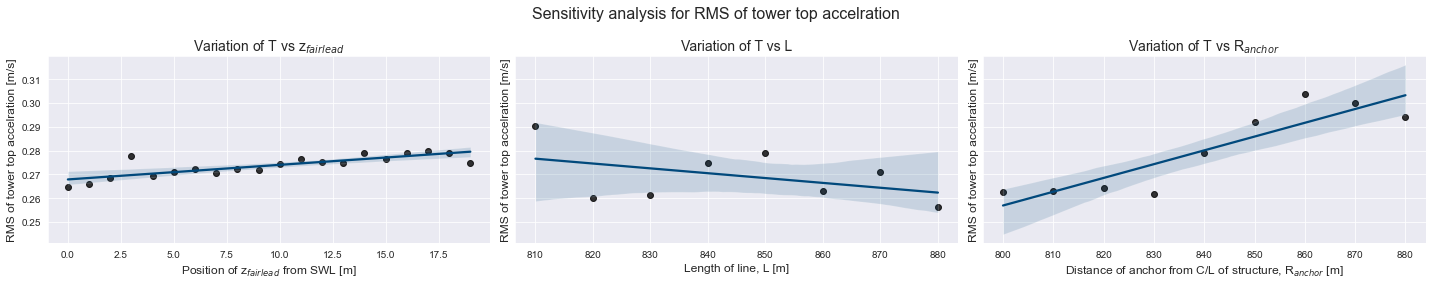

In [10]:
# Sensitivity plot
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)
fig.suptitle('Sensitivity analysis for RMS of tower top accelration', size = 16)

# z_fairlead
sns.regplot(ax=axes[0], x='z_fairlead', y='RMS', data=df1, scatter_kws={"color": "black"}, line_kws={"color": "#01497C"})
axes[0].set_xlabel( "Position of z$_{fairlead}$ from SWL [m]" , size = 12 )
axes[0].set_ylabel( "RMS of tower top accelration [m/s]" , size = 12 )
axes[0].set_title('Variation of T vs z$_{fairlead}$', size = 14)

# L_values
sns.regplot(ax=axes[1],x="L_values", y="RMS", data=df2, scatter_kws={"color": "black"}, line_kws={"color": "#01497C"})
axes[1].set_xlabel( "Length of line, L [m]" , size = 12 )
axes[1].set_ylabel( "RMS of tower top accelration [m/s]" , size = 12 )
axes[1].set_title('Variation of T vs L', size = 14)

# R_anchor
sns.regplot(ax=axes[2],x="R_anchor", y="RMS", data=df3, scatter_kws={"color": "black"}, line_kws={"color": "#01497C"})
axes[2].set_xlabel( "Distance of anchor from C/L of structure, R$_{anchor}$ [m]" , size = 12 )
axes[2].set_ylabel( "RMS of tower top accelration [m/s]" , size = 12 )
axes[2].set_title('Variation of T vs R$_{anchor}$', size = 14)

plt.tight_layout()
plt.show()

# Check for good design in data (reference 15 MW value)

In [11]:
df4 = df[(df['L_values']< 850) & (df['RMS']<= df['RMS'].values[df.index.get_loc(reference_value.name)]) ]

df4.to_csv('Reference_values_att_41.csv',index=True)

# Data analysis

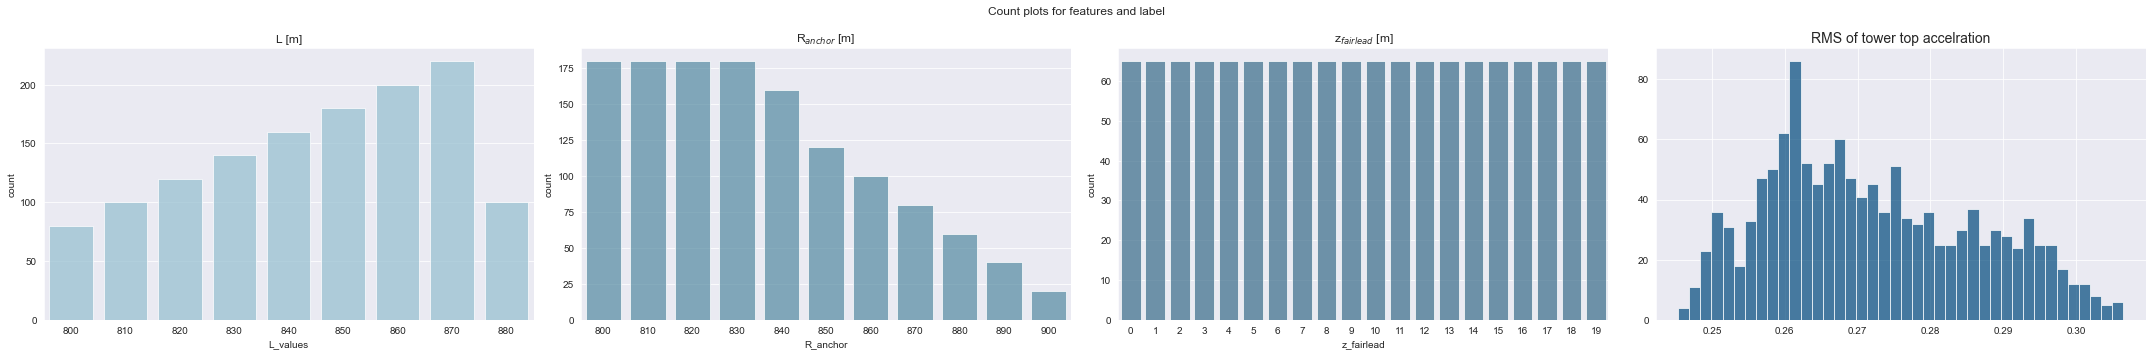

In [12]:
fig, ax = plt.subplots(1, 4,  figsize=(30,5))
fig.suptitle('Count plots for features and label')

#L
sns.countplot(ax=ax[0], x='L_values',data=df, color='#89C2D9', alpha=0.7)
ax[0].set_title('L [m]', size = 12)

# R_anchor
sns.countplot(ax=ax[1], x='R_anchor',data=df, color='#468FAF', alpha=0.7)
ax[1].set_title('R$_{anchor}$ [m]', size = 12)

# z_fairlead
sns.countplot(ax=ax[2], x='z_fairlead',data=df, color='#2A6F97', alpha=0.7)
ax[2].set_title('z$_{fairlead}$ [m]', size = 12)

# count tension
df.hist(ax=ax[3], column='RMS',bins=40, color='#01497C', alpha=0.7)
ax[3].set_title('RMS of tower top accelration', size = 14)

plt.tight_layout()

In [13]:
import warnings
warnings.filterwarnings("ignore")

<Figure size 720x720 with 0 Axes>

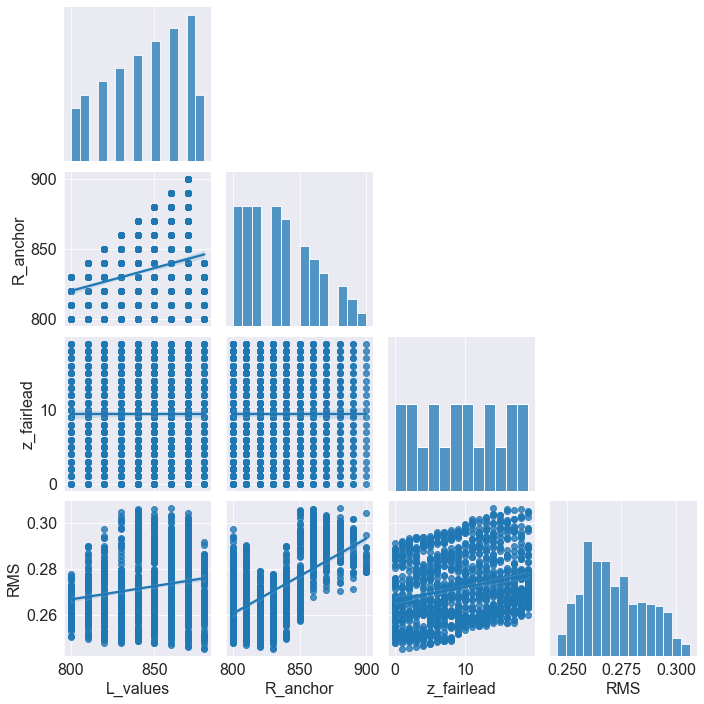

In [14]:
# pairplot to inspect relationship between dependant and independant variable
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.grid':True})
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
sns.pairplot(df, kind='reg', corner=True)
plt.show()

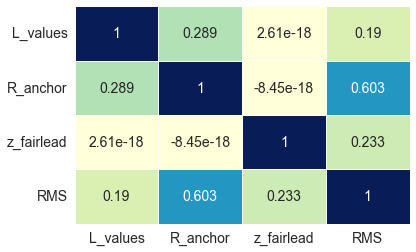

In [15]:
#plot heat map
plt.rcParams.update({'font.size': 14})
sns.heatmap(df.corr(), annot=True, fmt=".3g", linewidths=.5, cmap="YlGnBu", cbar=False)
plt.show()

In [16]:
df.describe().transpose()[['count', 'mean', 'std', 'min', 'max']] 

,count,mean,std,min,max
L_values,1300.0,844.923077,23.288073,800.000000,880.000000
R_anchor,1300.0,834.769231,26.269621,800.000000,900.000000
z_fairlead,1300.0,9.500000,5.768500,0.000000,19.000000
RMS,1300.0,0.272008,0.014251,0.245345,0.306517


# Split data into train and test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
features=['L_values','R_anchor','z_fairlead']
labels=['RMS']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(df[features],df[labels],test_size=0.2,random_state=42)

In [20]:
print(x_train.min())
print(x_train.max())


L_values      800
R_anchor      800
z_fairlead      0
dtype: int64
L_values      880
R_anchor      900
z_fairlead     19
dtype: int64


In [21]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1040, 3)
x_test shape: (260, 3)
y_train shape: (1040, 1)
y_test shape: (260, 1)


In [22]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)

x_train shape: (1040, 3)
x_test shape: (260, 3)


# Feature scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler=MinMaxScaler()

In [25]:
x_train = scaler.fit_transform(x_train.values)
x_test = scaler.transform(x_test.values)

In [26]:
import pickle 

pickle.dump(scaler, open('scaler_41.pkl','wb'))

In [27]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)

x_train shape: (1040, 3)
x_test shape: (260, 3)


# Model build

In [28]:
from tensorflow.keras import layers
from keras.callbacks import History

In [44]:
# initialize model
inputs = keras.Input(shape=(3))
x = layers.Dense(10, activation='relu', name = 'first_layer')(inputs)
x = layers.Dense(6, activation='relu', name = 'second_layer')(x)
outputs = layers.Dense(1, activation='linear', name = 'output_layer')(x)

model = keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    loss = keras.losses.MeanSquaredError(),
    metrics =  ['mse'],
    optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

# fit the keras model on the dataset
history = History()
model.fit(x_train, y_train, epochs=1500, batch_size=64, verbose=2, callbacks=[history], validation_split=0.3, shuffle=True)

Epoch 1/1500
12/12 - 1s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0151 - val_mse: 0.0151 - 749ms/epoch - 62ms/step
Epoch 2/1500
12/12 - 0s - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0111 - val_mse: 0.0111 - 46ms/epoch - 4ms/step
Epoch 3/1500
12/12 - 0s - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0080 - val_mse: 0.0080 - 46ms/epoch - 4ms/step
Epoch 4/1500
12/12 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0054 - val_mse: 0.0054 - 47ms/epoch - 4ms/step
Epoch 5/1500
12/12 - 0s - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0037 - val_mse: 0.0037 - 57ms/epoch - 5ms/step
Epoch 6/1500
12/12 - 0s - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0024 - val_mse: 0.0024 - 51ms/epoch - 4ms/step
Epoch 7/1500
12/12 - 0s - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0016 - val_mse: 0.0016 - 56ms/epoch - 5ms/step
Epoch 8/1500
12/12 - 0s - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0011 - val_mse: 0.0011 - 56ms/epoch - 5ms/step
Epoch 9/1500
12/12 - 0s - loss: 9.6989e-04 - mse: 9.6989e-04 - val_loss: 8.0649e-04 - 

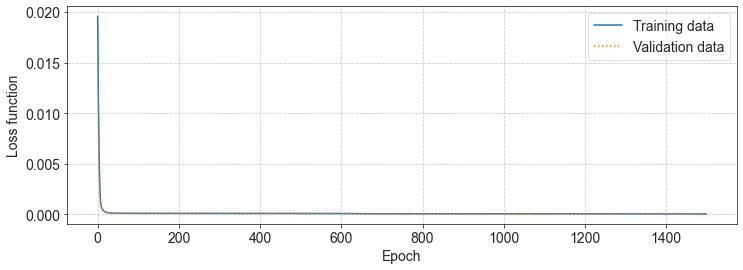

In [45]:
# recored of history of validation vs training loss
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": "--"})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

# recored of history of validation vs training loss
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], linewidth=1.5)
plt.plot(history.history['val_loss'], ":")
# plt.title('model loss')
# plt.xlim([-20, 1800])
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='best', fancybox=True, framealpha=0.6)
plt.grid(True)
plt.show()

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 first_layer (Dense)         (None, 10)                40        
                                                                 
 second_layer (Dense)        (None, 6)                 66        
                                                                 
 output_layer (Dense)        (None, 1)                 7         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


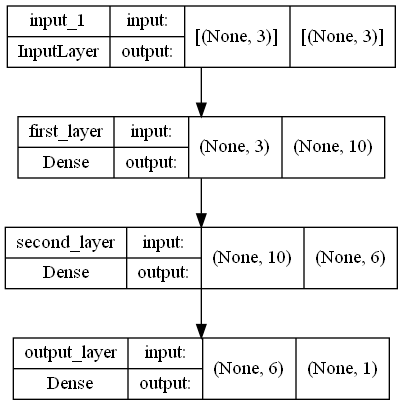

In [32]:
from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(model, show_shapes=True, show_layer_names=True)

# Prediction

In [48]:
yhat = model.predict(x_test)

# Model performance

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score

In [49]:
error = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % error)

MAE: 0.005


In [50]:
r2 = r2_score(y_test, yhat)
print('R-squared: %.3f' % r2)

R-squared: 0.825


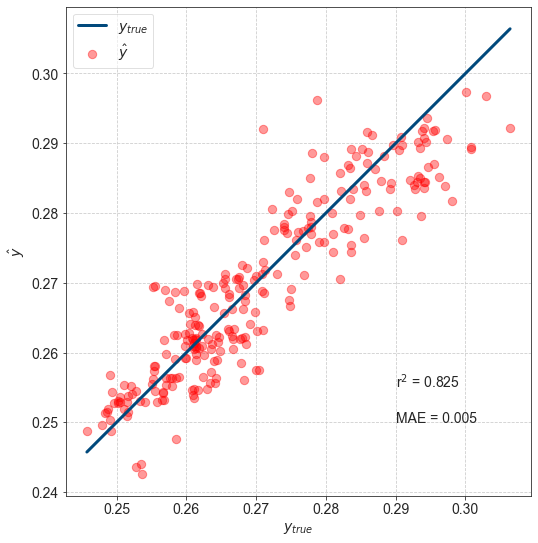

In [51]:
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": "--"})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

plt.figure(figsize=(9,9))
plt.rcParams.update({'font.size': 14})
plt.axes(aspect='equal')
sns.lineplot(x=y_test.iloc[:,0], y=y_test.iloc[:,0], linewidth=3, color='#01497C', label='$y_{true}$')
plt.scatter(x=y_test.iloc[:,0], y=yhat[:,0], c="red", label='$\hat{y}$', s=70, alpha = 0.4)

plt.annotate("r$^2$ = {:.3f}".format(r2), (0.29, 0.255))
plt.annotate("MAE = {:.3f}".format(error), (0.29, 0.25))

plt.xlabel('$y_{true}$')
plt.ylabel('$\hat{y}$')

plt.legend(loc='upper left', fancybox=True, framealpha=0.6)
# plt.title('Validation of the prediction model')     
plt.grid(True)

# plt.savefig('model validation.png', transparent=True)
plt.show()

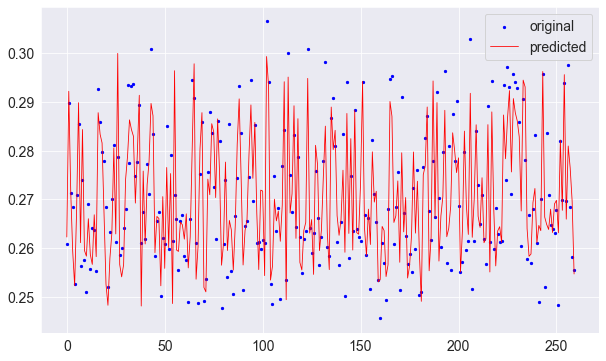

In [101]:
x_ax = range(len(yhat))
plt.figure(figsize=(10,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, yhat, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
# save model
model.save('model_attribute_41')

INFO:tensorflow:Assets written to: model_attribute_41\assets
